In [ ]:
import torch
import torchvision           # contains already functions and libraries to work with images
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

dataset=MNIST(root='data/',download=True,)                      # downloading training dataset and already converted into pytorch object

In [2]:
train_data=MNIST(root='data/', train=True, transform=ToTensor())         # reads the train data and converts it into pytorch tensor
test_data=MNIST(root='data/', train=False, transform=ToTensor())
len(train_data), len(test_data)
#train_data[0]

(60000, 10000)

In [ ]:
train=MNIST(root='data/', train=True)
test=MNIST(root='data/', train=False)
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

label: 5


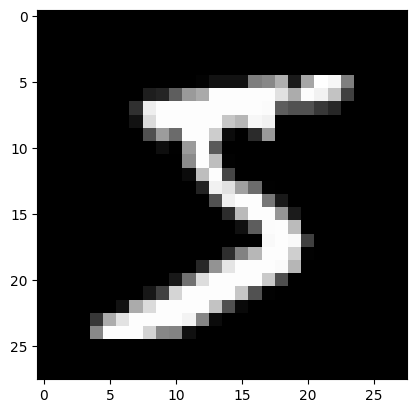

In [ ]:
%matplotlib inline
image, label=train[0]
plt.imshow(image, cmap='gray')    # imshow() to visualise the image
print('label:', label)

In [ ]:
img_tensor , label=train_data[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
from torch.utils.data import random_split
train_ds, val_ds=random_split(train_data, [50000, 10000])         #randomly splitting training data into training and validation dataset
len(train_ds), len(val_ds)



(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader     #importing dataloader to split the dataset into small batches to feed at once to neural network
batch_size=128
train_dl=DataLoader(train_ds,batch_size,shuffle=True)          # size of each batch is 128
val_dl=DataLoader(val_ds,batch_size , shuffle=True)

In [ ]:
test_dl=DataLoader(test_data ,200,shuffle=True)                        # For testing purpose

In [ ]:
import torch.nn as nn
input_size=784
hidden_size=128
output_size=10

'''for images , labels in train_dl:
  print(images.shape)
  break'''

for images , labels in train_dl:
  images=images.reshape(images.size(0), -1)           # reshaping each batch to flatten image tensor into 1D tensor dynamically


In [ ]:
import torch

class fivelayernn(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(fivelayernn, self).__init__()


        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.layer4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()   # for hidden layers


    def forward(self, x):

        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x)
        return x



model=fivelayernn(input_size,hidden_size,output_size)

In [ ]:

loss_fn=nn.CrossEntropyLoss()          # for calculating loss in multi class classification

opt=torch.optim.SGD(model.parameters(),lr=1e-3)       # optimiser (Stochastic gradient optimizer)

def training(epoch ,model ,loss_fn ,opt,train_dl):
  for e in range(epoch):
    model.train()                                            # setting model to training mode
    for images , labels in train_dl:
      images = images.reshape(images.size(0), -1)     # checking only
      opt.zero_grad()
      output=model(images)
      loss=loss_fn(output,labels)
      loss.backward()                                           # Back propagation
      opt.step()
      if (e+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(e+1, epoch, loss.item()))

training(1500,model,loss_fn,opt,train_dl)

Streaming output truncated to the last 5000 lines.
Epoch [1380/1500], Loss: 0.0105
Epoch [1380/1500], Loss: 0.0083
Epoch [1380/1500], Loss: 0.0235
Epoch [1380/1500], Loss: 0.0127
Epoch [1380/1500], Loss: 0.0114
Epoch [1380/1500], Loss: 0.0087
Epoch [1380/1500], Loss: 0.0071
Epoch [1380/1500], Loss: 0.0039
Epoch [1380/1500], Loss: 0.0085
Epoch [1380/1500], Loss: 0.0156
Epoch [1380/1500], Loss: 0.0118
Epoch [1380/1500], Loss: 0.0153
Epoch [1380/1500], Loss: 0.0165
Epoch [1380/1500], Loss: 0.0113
Epoch [1380/1500], Loss: 0.0201
Epoch [1380/1500], Loss: 0.0097
Epoch [1380/1500], Loss: 0.0097
Epoch [1380/1500], Loss: 0.0068
Epoch [1380/1500], Loss: 0.0104
Epoch [1380/1500], Loss: 0.0095
Epoch [1380/1500], Loss: 0.0220
Epoch [1380/1500], Loss: 0.0157
Epoch [1380/1500], Loss: 0.0109
Epoch [1380/1500], Loss: 0.0236
Epoch [1380/1500], Loss: 0.0122
Epoch [1380/1500], Loss: 0.0157
Epoch [1380/1500], Loss: 0.0098
Epoch [1380/1500], Loss: 0.0131
Epoch [1380/1500], Loss: 0.0049
Epoch [1380/1500], Lo

In [ ]:
for images , labels in test_dl:
  images=images.reshape(images.size(0), -1)
loss_fn=nn.CrossEntropyLoss()
def test(model , test_dl , loss_fn):                              # Function to evaluate the model
  model.eval()                                             # setting model to evaluation mode
  correct=0
  total=0
  test_loss=0
  with torch.no_grad():
    for images , labels in test_dl:
      images=images.reshape(images.size(0),-1)
      output=model(images)
      loss=loss_fn(output ,labels)

      test_loss+=loss.item()
      _, predicted=torch.max(output ,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  average_loss = test_loss / len(test_dl)

  print(f'Test Loss: {average_loss:.4f}')                                     #Printing average loss per batch
  print(f'Test Accuracy: {accuracy:.2f}%')                                # printing accuracy - total number of correct predictions/ total number of total cases

test(model, test_dl, loss_fn)

Test Loss: 0.0956
Test Accuracy: 97.52%


In [ ]:
for images , labels in val_dl:
  images=images.reshape(images.size(0), -1)
def validat(val_dl , model):
  for image , label in val_dl:
    image=image.reshape(image.size(0),-1)
    pred=model(image)
    _, predicted=torch.max(pred ,1)           # to igone the logit valueof highest probablity class
    print('The predicted values are (in tensor form): ', predicted)
    print('\n')
    print('Actual values are (in tensor form): ', label)
    break
validat(val_dl,model)


The predicted values are (in tensor form):  tensor([3, 7, 3, 2, 8, 4, 9, 1, 5, 9, 9, 3, 2, 7, 3, 9, 8, 7, 6, 0, 9, 4, 9, 6,
        6, 1, 6, 4, 2, 0, 6, 9, 4, 0, 0, 7, 6, 1, 4, 6, 1, 2, 4, 8, 0, 2, 0, 3,
        9, 4, 7, 6, 1, 2, 0, 4, 5, 3, 4, 4, 8, 3, 0, 6, 6, 3, 8, 7, 8, 7, 4, 5,
        2, 7, 6, 4, 0, 4, 5, 5, 4, 2, 1, 0, 0, 5, 0, 5, 0, 1, 3, 8, 9, 3, 2, 0,
        7, 3, 5, 9, 8, 9, 7, 0, 1, 8, 4, 6, 2, 7, 8, 0, 2, 2, 3, 9, 5, 6, 0, 0,
        3, 4, 1, 6, 0, 1, 2, 3])


Actual values are (in tensor form):  tensor([3, 7, 3, 2, 8, 4, 9, 1, 5, 9, 9, 3, 2, 7, 3, 9, 3, 7, 6, 0, 9, 4, 9, 6,
        6, 1, 6, 4, 2, 0, 6, 9, 4, 0, 0, 7, 8, 1, 9, 6, 1, 2, 4, 8, 0, 2, 0, 3,
        9, 4, 7, 6, 1, 2, 0, 4, 5, 3, 4, 4, 8, 3, 0, 6, 6, 3, 8, 7, 8, 7, 4, 5,
        3, 7, 6, 4, 0, 4, 5, 5, 1, 2, 1, 0, 0, 5, 0, 5, 0, 1, 3, 8, 9, 3, 2, 0,
        7, 3, 5, 9, 8, 9, 7, 0, 1, 8, 4, 6, 2, 7, 8, 6, 2, 2, 3, 9, 5, 6, 0, 0,
        3, 4, 1, 6, 0, 1, 2, 3])
